# Cost of Living (Programmentwurf Data Science Prototyp)

Gruppe G3: _möglichst exotisch_

Mitarbeiter:   
- 9494494
- 9514327

## 1. Business Understanding

Als Remote Worker in der Kreativbranche möchten wir für einen begrenzten Zeitraum ins Ausland ziehen. Dabei wollen wir in einen möglichst exotischen Ort gehen.\
Der gesuchte exotische Ort soll dabei hauptsächlich im vergleich zu einem Ort in Deutschland exotisch sein.\

Dafür soll trotzdem eine stabile Internetverbindung zu einem bezahlbaren preis vorliegen. Diese ist wichtig, da wir in der Zeit weiter von Remote arbeiten müssen.\
Das Ziel soll Kulturell anders sein als im Süden von Deutschland, optimal wäre dafür ein Ziel außerhalb Europas.\
Ein exotischer Ort zeichnet sich damit aus, wenn Mieten im vergleich zum Raum Stuttgart geringer sind. Auch das monatliche netto Gehalt ist geringer als im Vergleich hier. Die Lebensmittelkosten sind geringer als hier. Auch die Basic-Ausgaben für eine Wohnung (Strom, Heizung, Wasser, Kühlung und Müll) sollen geringer sein.\



In [7]:
%pip install pandas

import pandas as pd
import os

Note: you may need to restart the kernel to use updated packages.


## 2. Data Preparation & Feature Engineering

In [8]:
df = pd.read_csv("cost-of-living_v2.csv")
df_countries = pd.read_csv("countries.csv")

df_countries = df_countries[["name", "region"]]
df_countries.rename(columns={"name": "country", "region": "continent"}, inplace=True)

df = df.merge(df_countries, on="country", how="left")

# Entfernen von Daten mit schlechter Qualität
df = df[df["data_quality"] == 1]
df.drop(columns=["data_quality"], inplace=True)

# Neue Spaltennamen zuweisen
new_column_names = {
    "x1": "Meal, Inexpensive Restaurant (USD)",
    "x2": "Meal for 2 People, Mid-range Restaurant, Three-course (USD)",
    "x3": "McMeal at McDonalds (or Equivalent Combo Meal) (USD)",
    "x4": "Domestic Beer (0.5 liter draught, in restaurants) (USD)",
    "x5": "Imported Beer (0.33 liter bottle, in restaurants) (USD)",
    "x6": "Cappuccino (regular, in restaurants) (USD)",
    "x7": "Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)",
    "x8": "Water (0.33 liter bottle, in restaurants) (USD)",
    "x9": "Milk (regular), (1 liter) (USD)",
    "x10": "Loaf of Fresh White Bread (500g) (USD)",
    "x11": "Rice (white), (1kg) (USD)",
    "x12": "Eggs (regular) (12) (USD)",
    "x13": "Local Cheese (1kg) (USD)",
    "x14": "Chicken Fillets (1kg) (USD)",
    "x15": "Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)",
    "x16": "Apples (1kg) (USD)",
    "x17": "Banana (1kg) (USD)",
    "x18": "Oranges (1kg) (USD)",
    "x19": "Tomato (1kg) (USD)",
    "x20": "Potato (1kg) (USD)",
    "x21": "Onion (1kg) (USD)",
    "x22": "Lettuce (1 head) (USD)",
    "x23": "Water (1.5 liter bottle, at the market) (USD)",
    "x24": "Bottle of Wine (Mid-Range, at the market) (USD)",
    "x25": "Domestic Beer (0.5 liter bottle, at the market) (USD)",
    "x26": "Imported Beer (0.33 liter bottle, at the market) (USD)",
    "x27": "Cigarettes 20 Pack (Marlboro) (USD)",
    "x28": "One-way Ticket (Local Transport) (USD)",
    "x29": "Monthly Pass (Regular Price) (USD)",
    "x30": "Taxi Start (Normal Tariff) (USD)",
    "x31": "Taxi 1km (Normal Tariff) (USD)",
    "x32": "Taxi 1hour Waiting (Normal Tariff) (USD)",
    "x33": "Gasoline (1 liter) (USD)",
    "x34": "Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)",
    "x35": "Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)",
    "x36": "Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)",
    "x37": "1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)",
    "x38": "Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)",
    "x39": "Fitness Club, Monthly Fee for 1 Adult (USD)",
    "x40": "Tennis Court Rent (1 Hour on Weekend) (USD)",
    "x41": "Cinema, International Release, 1 Seat (USD)",
    "x42": "Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)",
    "x43": "International Primary School, Yearly for 1 Child (USD)",
    "x44": "1 Pair of Jeans (Levis 501 Or Similar) (USD)",
    "x45": "1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)",
    "x46": "1 Pair of Nike Running Shoes (Mid-Range) (USD)",
    "x47": "1 Pair of Men Leather Business Shoes (USD)",
    "x48": "Apartment (1 bedroom) in City Centre (USD)",
    "x49": "Apartment (1 bedroom) Outside of Centre (USD)",
    "x50": "Apartment (3 bedrooms) in City Centre (USD)",
    "x51": "Apartment (3 bedrooms) Outside of Centre (USD)",
    "x52": "Price per Square Meter to Buy Apartment in City Centre (USD)",
    "x53": "Price per Square Meter to Buy Apartment Outside of Centre (USD)",
    "x54": "Average Monthly Net Salary (After Tax) (USD)",
    "x55": "Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
}

df.rename(columns=new_column_names, inplace=True)

# Bewertung der Qualität aller Spalten
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

quality_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

print(quality_report)

df.to_csv("cost-of-living_adapted.csv", index=False)

                                                    Missing Values  \
city                                                             0   
country                                                          0   
Meal, Inexpensive Restaurant (USD)                               0   
Meal for 2 People, Mid-range Restaurant, Three-...               0   
McMeal at McDonalds (or Equivalent Combo Meal) ...               0   
Domestic Beer (0.5 liter draught, in restaurant...               1   
Imported Beer (0.33 liter bottle, in restaurant...               1   
Cappuccino (regular, in restaurants) (USD)                       0   
Coke/Pepsi (0.33 liter bottle, in restaurants) ...               1   
Water (0.33 liter bottle, in restaurants) (USD)                  0   
Milk (regular), (1 liter) (USD)                                  0   
Loaf of Fresh White Bread (500g) (USD)                           0   
Rice (white), (1kg) (USD)                                        0   
Eggs (regular) (12) 

Um unsere Auswertung vorzunehmen, haben wir im Business Understanding bereits festgelegt, welche Spalten wir für unsere Analyse benötigen.

Von diesen genannten sind durch fehlerhafte Daten nur nennenswert die Mietpreise betroffen. Diese und alle anderen werden wir im folgenden Schritt bereinigen.

In [9]:
# Ersetzen der fehlenden Werte durch den Median der jeweiligen Spalte, außer Spalten mit Strings
columns_with_missing_values = missing_percentage[missing_percentage > 0].index
numeric_columns_with_missing_values = df[columns_with_missing_values].select_dtypes(include=['number']).columns

for column in numeric_columns_with_missing_values:
    median_value = df[column].median()
    df.fillna({column: median_value}, inplace=True)

# Überprüfen, ob alle fehlenden Werte ersetzt wurden
missing_values_after_cleaning = df.isnull().sum()
print(missing_values_after_cleaning)

city                                                                                0
country                                                                             0
Meal, Inexpensive Restaurant (USD)                                                  0
Meal for 2 People, Mid-range Restaurant, Three-course (USD)                         0
McMeal at McDonalds (or Equivalent Combo Meal) (USD)                                0
Domestic Beer (0.5 liter draught, in restaurants) (USD)                             0
Imported Beer (0.33 liter bottle, in restaurants) (USD)                             0
Cappuccino (regular, in restaurants) (USD)                                          0
Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)                                0
Water (0.33 liter bottle, in restaurants) (USD)                                     0
Milk (regular), (1 liter) (USD)                                                     0
Loaf of Fresh White Bread (500g) (USD)                

Es ist jetzt zu sehen, dass alle spalten, und nicht nur die die wir für unsere Analyse benötigen, bereinigt wurden.
Dafür wurden alle fehlenden Werte durch den Median der entsprechenden Spalte ersetzt. 

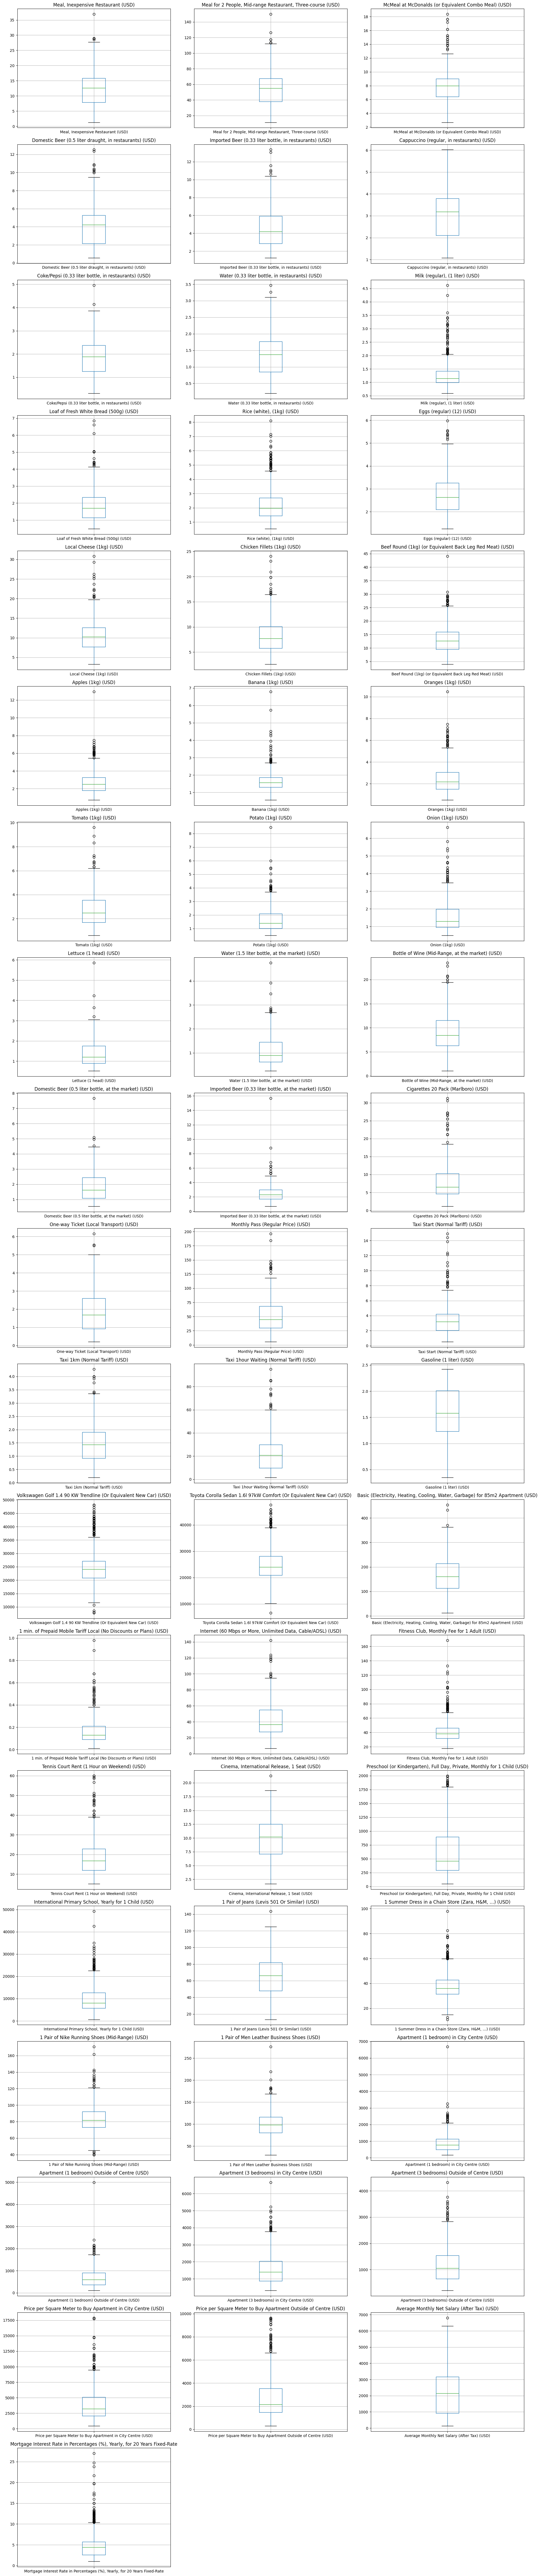

In [21]:
import matplotlib.pyplot as plt

# Erstellen Sie eine Liste der numerischen Spalten
numeric_columns = df.select_dtypes(include=['number']).columns

# Anzahl der Spalten für die Subplots
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Entfernen Sie überflüssige Achsen
for i in range(num_rows * num_cols):
    if i >= len(numeric_columns):
        fig.delaxes(axes.flatten()[i])

# Erstellen Sie für jede numerische Spalte einen eigenen Boxplot
for ax, column in zip(axes.flatten(), numeric_columns):
    df.boxplot(column=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

## 3. Data Exploration und Analyse

## 4. Modeling und Evaluation Regression

## 5. Unüberwachtes Lernen - Clustering

## 6. Deployment